In [195]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [196]:
analysis = scripts.Analysis()

In [197]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_5',
                          'wgt_1_.85_.7_.6_.45',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [198]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_5',
                               'wgt_1_.85_.7_.6_.45',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [199]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [200]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [201]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [202]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [203]:
fig.display_hrefanchor()

In [204]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [205]:
table_dgdgs.display_hrefanchor()

In [206]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

In [207]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

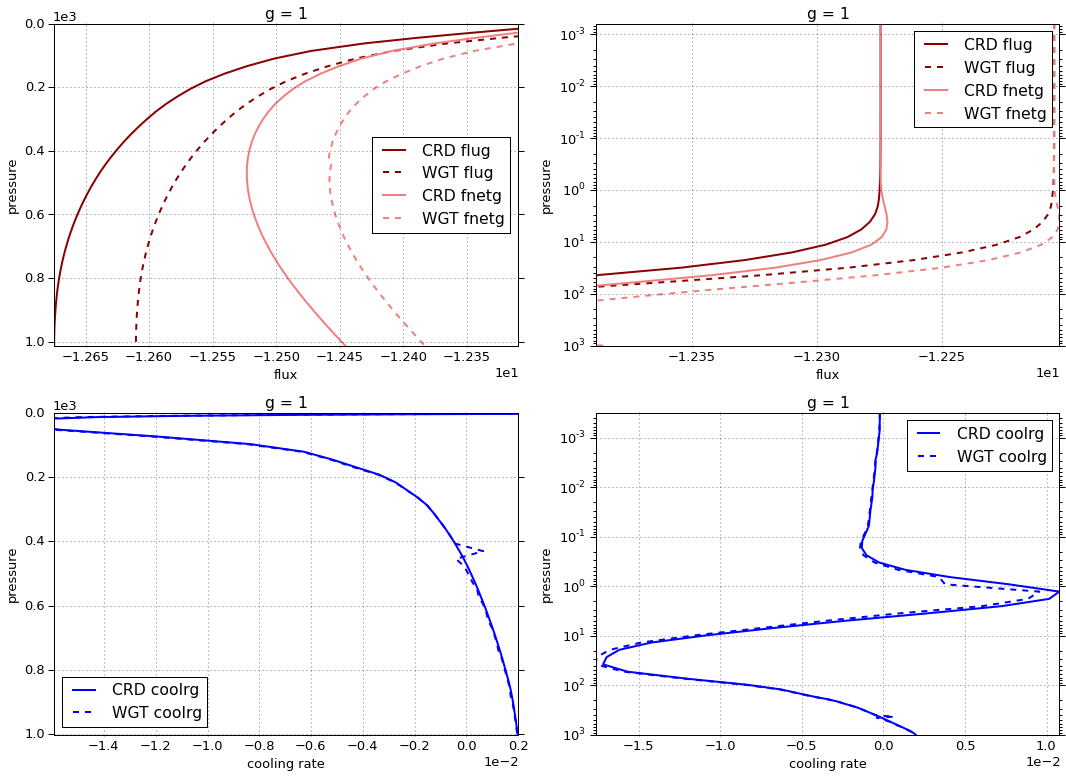

# Figure: flux, cooling rate. g-group 2

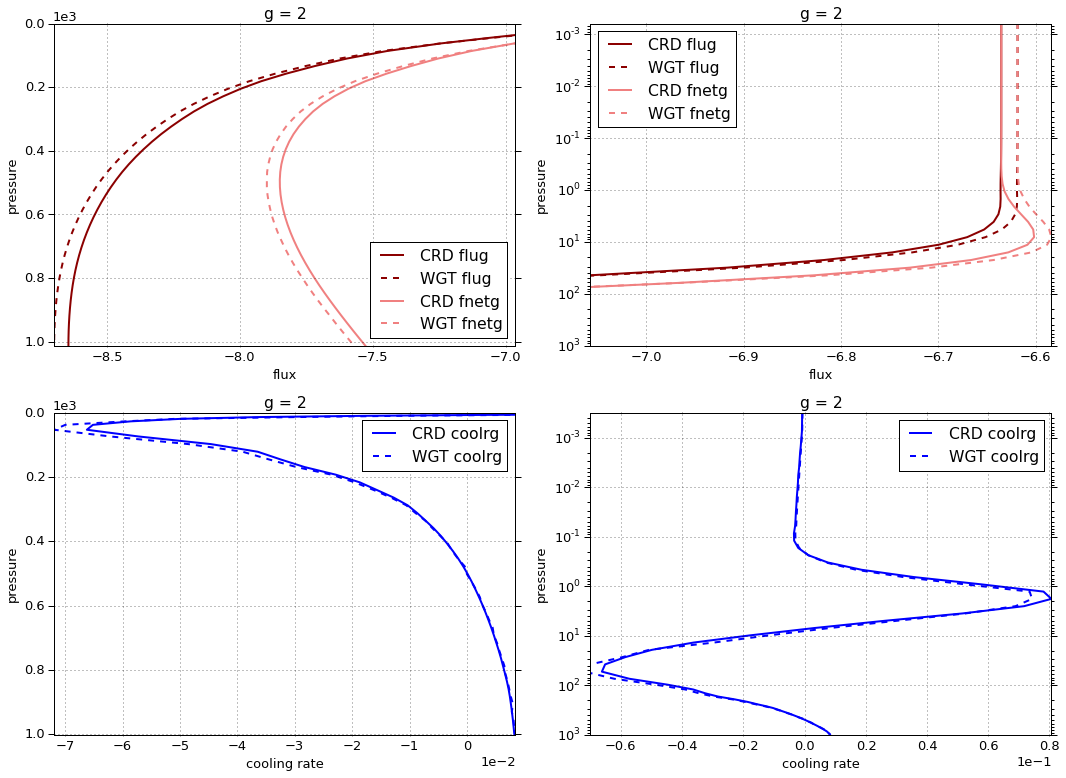

# Figure: flux, cooling rate. g-group 3

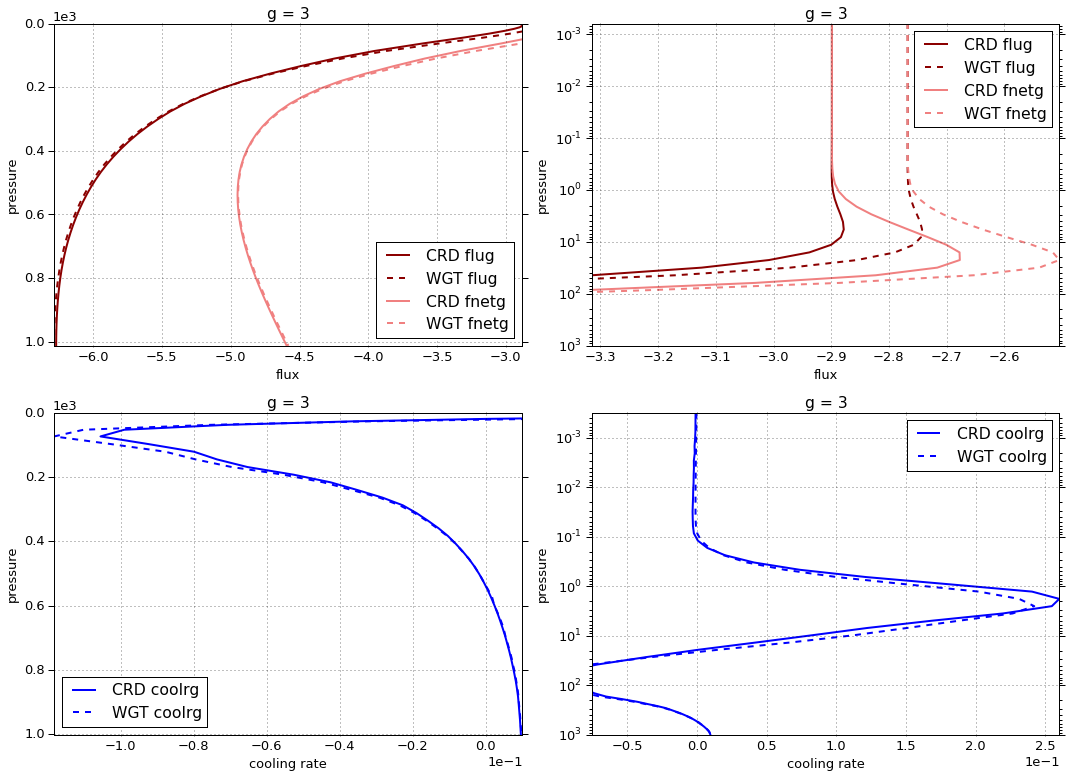

# Figure: flux, cooling rate. g-group 4

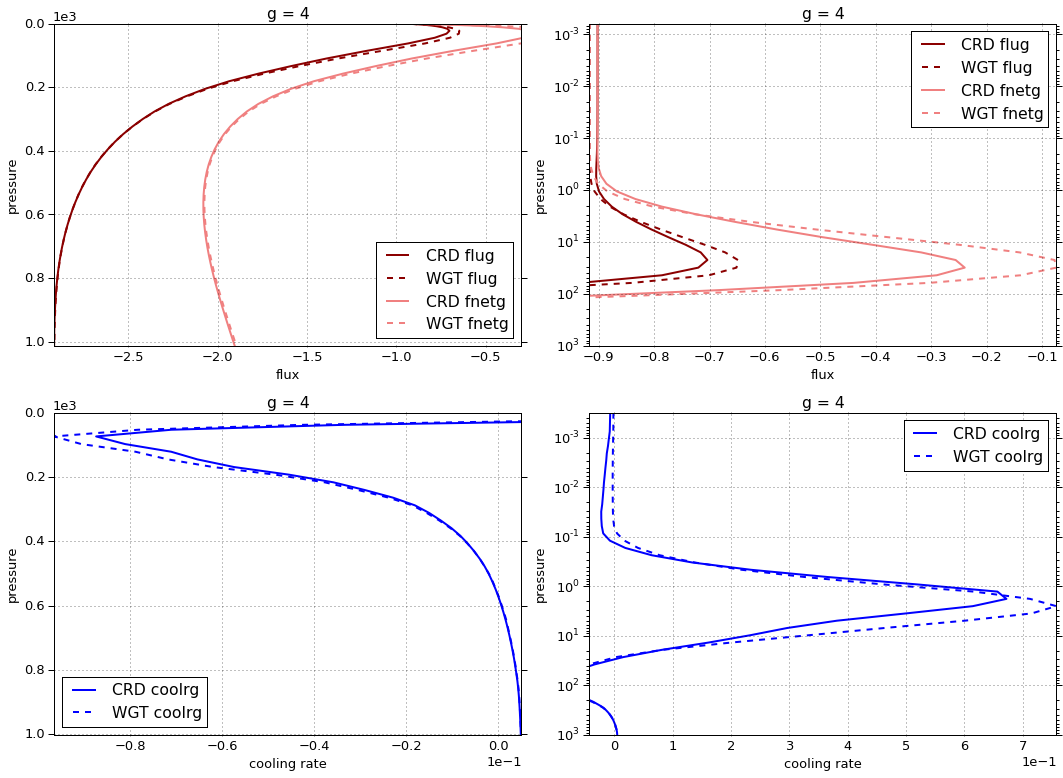

# Figure: flux, cooling rate. g-group 5

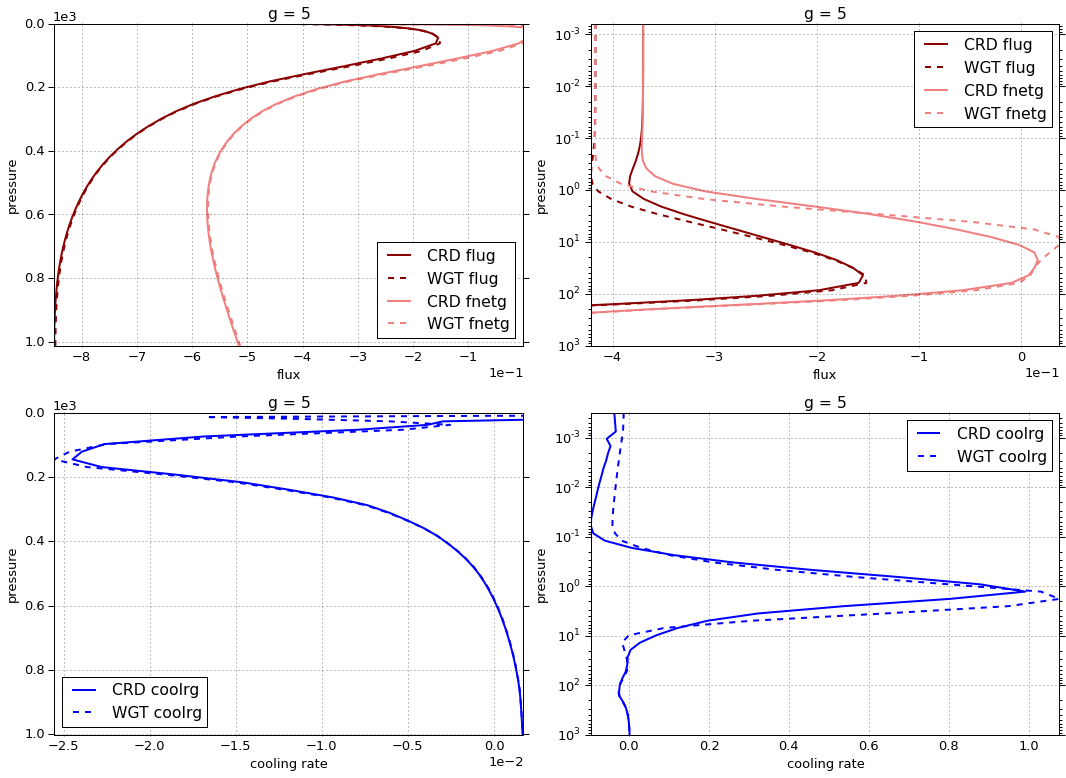

# Figure: flux, cooling rate. g-group total

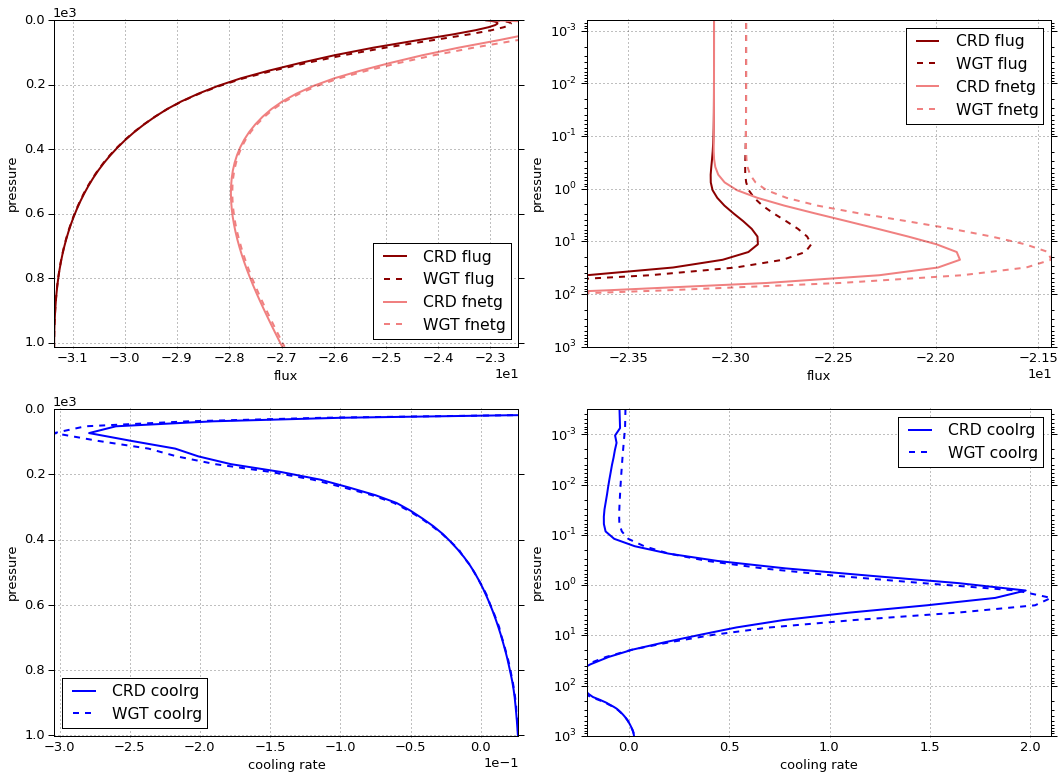

In [208]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [209]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.274527  0.000000 -12.274527
  1013     76    -12.674908  0.229195 -12.445712
2 0        1      -6.635504  0.000000  -6.635504
  1013     76     -8.646580  1.118645  -7.527935
3 0        1      -2.898934  0.000000  -2.898934
  1013     76     -6.269207  1.676264  -4.592942
4 0        1      -0.902136  0.000000  -0.902136
  1013     76     -2.913815  1.009412  -1.904403
5 0        1      -0.370206  0.000000  -0.370206
  1013     76     -0.849725  0.334272  -0.515454


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.205060  0.000000 -12.205060
  1013     76    -12.610552  0.227502 -12.383049
2 0        1      -6.618770  0.000000  -6.618770
  1013     76     -8.700310  1.129782  -7.570528
3 0        1      -2.767738  0.000000  -2.767738
  1013     76     -6.283752  1.703013  -4.580738
4 0        1      -0.916501  0.000000  -0.916501
  1013     76     -2.912185  1.017025  -1.895160
5 0        1      -0.416873  0.000000  -0.416873
  1013     76     -0.847437  0.334538  -0.512899


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.069467  0.000000  0.069467
  1013     76     0.064356 -0.001693  0.062663
2 0        1      0.016734  0.000000  0.016734
  1013     76    -0.053730  0.011137 -0.042593
3 0        1      0.131196  0.000000  0.131196
  1013     76    -0.014545  0.026749  0.012204
4 0        1     -0.014365  0.000000 -0.014365
  1013     76     0.001630  0.007613  0.009243
5 0        1     -0.046667  0.000000 -0.046667
  1013     76     0.002289  0.000267  0.002555

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000213
  1001.112500 75     0.001983
2 0.000312    1     -0.000803
  1001.112500 75     0.008280
3 0.000312    1     -0.001036
  1001.112500 75     0.009587
4 0.000312    1     -0.007069
  1001.112500 75     0.004942
5 0.000312    1     -0.036489
  1001.112500 75     0.001656


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000223
  1001.112500 75     0.001966
2 0.000312    1     -0.000711
  1001.112500 75     0.008410
3 0.000312    1     -0.000460
  1001.112500 75     0.009775
4 0.000312    1     -0.001617
  1001.112500 75     0.004981
5 0.000312    1     -0.012855
  1001.112500 75     0.001652


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000010
  1001.112500 75    -0.000017
2 0.000312    1      0.000092
  1001.112500 75     0.000130
3 0.000312    1      0.000577
  1001.112500 75     0.000187
4 0.000312    1      0.005452
  1001.112500 75     0.000039
5 0.000312    1      0.023635
  1001.112500 75    -0.000003

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.081308,0.000000,-23.081308
1013,76,-31.354235,4.367789,-26.986446



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.924943,0.000000,-22.924943
1013,76,-31.354235,4.411861,-26.942374



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.563644e-01,0.000000,0.156364
1013,76,4.000000e-08,0.044072,0.044072


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045611
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.015866
1001.112500,75,0.026785



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.029744
1001.112500,75,0.000336


In [210]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.271208,0.277484
3,0.198167,0.200412
4,0.092708,0.092880
5,0.027167,0.027028


In [211]:
writer = pd.ExcelWriter('results.xlsx')

In [212]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 1

crd                                 wgt                \
                  flug          fldg      fnetg       flug          fldg   
pressure                                                                   
0.000000    -12.274527  0.000000e+00 -12.274527 -12.205060  0.000000e+00   
0.000624    -12.274527  3.367796e-09 -12.274527 -12.205060  3.289831e-09   
0.000876    -12.274527  4.909586e-09 -12.274527 -12.205060  4.795557e-09   
0.001229    -12.274527  7.591089e-09 -12.274527 -12.205060  7.412915e-09   
0.001723    -12.274527  1.213470e-08 -12.274527 -12.205060  1.184533e-08   
0.002417    -12.274527  1.966105e-08 -12.274527 -12.205060  1.918336e-08   
0.003391    -12.274527  3.192088e-08 -12.274527 -12.205060  3.112974e-08   
0.004757    -12.274527  5.162484e-08 -12.274527 -12.205060  5.031926e-08   
0.006672    -12.274528  8.295111e-08 -12.274528 -12.205060  8.081079e-08   
0.009359    -12.274528  1.323180e-07 -12.274528 -12.205060  1.288359e-07   
0.013128    -12.274528  2.095427e-07 -12.274528 -12.205061  2.039207e-07   
0.018415    -12.274529  3.296169e-07 -12.274528 -12.205061  3.206048e-07   
0.025830    -12.274530  5.153210e-07 -12.274529 -12.205062  5.009701e-07   
0.036232    -12.274531  8.013245e-07 -12.274530 -12.205063  7.786063e-07   
0.050823    -12.274533  1.243887e-06 -12.274532 -12.205065  1.208000e-06   
0.071291    -12.274536  1.985078e-06 -12.274534 -12.205068  1.926002e-06   
0.100000    -12.274541  3.549031e-06 -12.274537 -12.205074  3.434550e-06   
0.140271    -12.274551  7.300089e-06 -12.274544 -12.205084  7.032262e-06   
0.196760    -12.274569  1.607600e-05 -12.274553 -12.205102  1.540652e-05   
0.275997    -12.274598  3.601538e-05 -12.274562 -12.205132  3.435033e-05   
0.387100    -12.274646  8.032617e-05 -12.274566 -12.205182  7.629937e-05   
0.543100    -12.274718  1.771443e-04 -12.274541 -12.205256  1.677140e-04   
0.761700    -12.274819  3.833877e-04 -12.274436 -12.205363  3.620947e-04   
1.068500    -12.274960  8.045655e-04 -12.274156 -12.205622  7.588051e-04   
1.498800    -12.275190  1.583847e-03 -12.273606 -12.205870  1.494340e-03   
2.102400    -12.275690  2.809960e-03 -12.272880 -12.206399  2.656813e-03   
2.949000    -12.276769  4.615724e-03 -12.272154 -12.207517  4.380667e-03   
4.136600    -12.278823  7.041668e-03 -12.271782 -12.209725  6.718781e-03   
5.802500    -12.282283  1.004879e-02 -12.272234 -12.213345  9.649753e-03   
8.139200    -12.287833  1.373570e-02 -12.274098 -12.219049  1.328127e-02   
...                ...           ...        ...        ...           ...   
323.525000  -12.608299  9.427058e-02 -12.514028 -12.544995  9.454851e-02   
347.300000  -12.614383  9.741363e-02 -12.516969 -12.551040  9.764847e-02   
371.075000  -12.619985  1.006972e-01 -12.519288 -12.556599  1.008925e-01   
394.850000  -12.625168  1.041251e-01 -12.521043 -12.561734  1.042756e-01   
418.625000  -12.630007  1.077285e-01 -12.522278 -12.566521  1.078242e-01   
442.400000  -12.634495  1.114698e-01 -12.523026 -12.570956  1.140960e-01   
466.175000  -12.638633  1.153207e-01 -12.523313 -12.575039  1.170398e-01   
489.950000  -12.642425  1.192463e-01 -12.523179 -12.578776  1.205469e-01   
513.725000  -12.645921  1.232654e-01 -12.522655 -12.582217  1.242035e-01   
537.500000  -12.649164  1.274068e-01 -12.521757 -12.585405  1.280212e-01   
561.275000  -12.652161  1.316584e-01 -12.520502 -12.588348  1.321370e-01   
585.050000  -12.654931  1.360160e-01 -12.518915 -12.591066  1.362099e-01   
608.825000  -12.657488  1.404950e-01 -12.516993 -12.593573  1.405699e-01   
632.600000  -12.659834  1.450759e-01 -12.514758 -12.595870  1.450335e-01   
656.375000  -12.661979  1.497579e-01 -12.512221 -12.597968  1.494683e-01   
680.150000  -12.663931  1.545445e-01 -12.509386 -12.599875  1.541479e-01   
703.925000  -12.665690  1.594209e-01 -12.506269 -12.601592  1.589171e-01   
727.700000  -12.667265  1.643830e-01 -12.502882 -12.603128  1.637735e-01   
751.475000  -12.668663  1.694279e-01 -12.499235 -12.604490  1.68615

In [213]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 2

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -6.635504  0.000000e+00 -6.635504 -6.618770  0.000000e+00   
0.000624    -6.635504  1.908943e-08 -6.635504 -6.618770  1.711134e-08   
0.000876    -6.635504  2.782995e-08 -6.635504 -6.618771  2.495829e-08   
0.001229    -6.635504  4.303485e-08 -6.635504 -6.618771  3.860330e-08   
0.001723    -6.635504  6.880457e-08 -6.635504 -6.618771  6.171922e-08   
0.002417    -6.635505  1.115007e-07 -6.635504 -6.618771  1.000028e-07   
0.003391    -6.635505  1.810629e-07 -6.635505 -6.618771  1.623528e-07   
0.004757    -6.635505  2.928825e-07 -6.635505 -6.618771  2.625460e-07   
0.006672    -6.635506  4.706856e-07 -6.635505 -6.618772  4.218172e-07   
0.009359    -6.635507  7.509209e-07 -6.635506 -6.618773  6.727886e-07   
0.013128    -6.635508  1.189341e-06 -6.635507 -6.618774  1.065366e-06   
0.018415    -6.635511  1.871084e-06 -6.635509 -6.618776  1.675783e-06   
0.025830    -6.635514  2.925524e-06 -6.635511 -6.618779  2.619935e-06   
0.036232    -6.635519  4.549549e-06 -6.635515 -6.618784  4.074325e-06   
0.050823    -6.635527  7.062816e-06 -6.635520 -6.618791  6.325597e-06   
0.071291    -6.635539  1.127183e-05 -6.635527 -6.618801  1.009296e-05   
0.100000    -6.635559  2.013757e-05 -6.635539 -6.618819  1.800322e-05   
0.140271    -6.635597  4.128175e-05 -6.635556 -6.618852  3.679014e-05   
0.196760    -6.635660  9.028036e-05 -6.635570 -6.618908  8.018484e-05   
0.275997    -6.635758  2.001172e-04 -6.635558 -6.618994  1.772623e-04   
0.387100    -6.635899  4.399987e-04 -6.635459 -6.619114  3.891409e-04   
0.543100    -6.636068  9.531345e-04 -6.635115 -6.619257  8.428230e-04   
0.761700    -6.636211  2.019233e-03 -6.634192 -6.619368  1.788200e-03   
1.068500    -6.636241  4.145325e-03 -6.632096 -6.619363  3.685218e-03   
1.498800    -6.636163  8.045464e-03 -6.628118 -6.619139  7.208413e-03   
2.102400    -6.636553  1.419988e-02 -6.622353 -6.619502  1.288491e-02   
2.949000    -6.638435  2.327398e-02 -6.615161 -6.621203  2.149518e-02   
4.136600    -6.643341  3.543368e-02 -6.607907 -6.625733  3.341971e-02   
5.802500    -6.653111  5.042134e-02 -6.602690 -6.634958  4.862312e-02   
8.139200    -6.670489  6.870732e-02 -6.601782 -6.651688  6.766133e-02   
...               ...           ...       ...       ...           ...   
323.525000  -8.259515  4.809625e-01 -7.778553 -8.313907  4.870086e-01   
347.300000  -8.297377  4.984986e-01 -7.798879 -8.352308  5.049534e-01   
371.075000  -8.331877  5.166552e-01 -7.815222 -8.387164  5.228867e-01   
394.850000  -8.363460  5.354177e-01 -7.828043 -8.419002  5.416432e-01   
418.625000  -8.392635  5.548815e-01 -7.837754 -8.448446  5.616564e-01   
442.400000  -8.419431  5.748555e-01 -7.844576 -8.475240  5.813611e-01   
466.175000  -8.443896  5.951517e-01 -7.848744 -8.499799  6.016099e-01   
489.950000  -8.466107  6.155994e-01 -7.850507 -8.521934  6.227317e-01   
513.725000  -8.486400  6.362930e-01 -7.850107 -8.542267  6.430781e-01   
537.500000  -8.505069  6.573422e-01 -7.847726 -8.560811  6.639077e-01   
561.275000  -8.522178  6.786611e-01 -7.843517 -8.577809  6.853502e-01   
585.050000  -8.537867  7.003014e-01 -7.837566 -8.593373  7.072596e-01   
608.825000  -8.552240  7.222634e-01 -7.829977 -8.607639  7.290448e-01   
632.600000  -8.565331  7.444781e-01 -7.820853 -8.620567  7.513500e-01   
656.375000  -8.577211  7.669401e-01 -7.810271 -8.632314  7.740029e-01   
680.150000  -8.587942  7.896433e-01 -7.798299 -8.642870  7.972111e-01   
703.925000  -8.597551  8.125129e-01 -7.785039 -8.652353  8.199762e-01   
727.700000  -8.606094  8.355306e-01 -7.770563 -8.660744  8.431708e-01   
751.475000  -8.613628  8.587220e-01 -7.754906 -8.668147  8.664699e-01   
775.250000  -8.620193  8.820393e-01 -7.738153 -8.674583  8.900748e-01   
799.025000  -8.625828  9.054141e-01 -7.720414 -8.680090  9.139814e-01   
822

In [214]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 3

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -2.898934  0.000000e+00 -2.898934 -2.767738  0.000000e+00   
0.000624    -2.898934  4.923515e-08 -2.898934 -2.767738  3.373536e-08   
0.000876    -2.898934  7.178690e-08 -2.898934 -2.767738  4.922021e-08   
0.001229    -2.898934  1.110519e-07 -2.898934 -2.767738  7.619099e-08   
0.001723    -2.898935  1.776556e-07 -2.898934 -2.767739  1.219611e-07   
0.002417    -2.898935  2.880967e-07 -2.898935 -2.767739  1.978955e-07   
0.003391    -2.898935  4.681734e-07 -2.898935 -2.767739  3.217822e-07   
0.004757    -2.898936  7.578631e-07 -2.898935 -2.767739  5.212167e-07   
0.006672    -2.898937  1.218835e-06 -2.898936 -2.767740  8.388260e-07   
0.009359    -2.898938  1.945892e-06 -2.898937 -2.767741  1.340246e-06   
0.013128    -2.898941  3.084143e-06 -2.898938 -2.767742  2.126139e-06   
0.018415    -2.898944  4.855330e-06 -2.898940 -2.767744  3.350694e-06   
0.025830    -2.898950  7.596621e-06 -2.898942 -2.767747  5.249059e-06   
0.036232    -2.898958  1.182148e-05 -2.898946 -2.767751  8.180638e-06   
0.050823    -2.898970  1.836359e-05 -2.898951 -2.767757  1.273147e-05   
0.071291    -2.898988  2.933556e-05 -2.898958 -2.767767  2.038787e-05   
0.100000    -2.899018  5.250578e-05 -2.898966 -2.767783  3.661864e-05   
0.140271    -2.899071  1.077642e-04 -2.898963 -2.767807  7.551430e-05   
0.196760    -2.899149  2.352540e-04 -2.898914 -2.767839  1.658093e-04   
0.275997    -2.899244  5.185458e-04 -2.898726 -2.767862  3.680482e-04   
0.387100    -2.899317  1.129091e-03 -2.898188 -2.767832  8.084468e-04   
0.543100    -2.899237  2.411500e-03 -2.896826 -2.767607  1.746418e-03   
0.761700    -2.898700  5.013901e-03 -2.893686 -2.766951  3.685528e-03   
1.068500    -2.897165  1.007018e-02 -2.887095 -2.765362  7.552133e-03   
1.498800    -2.894011  1.916643e-02 -2.874844 -2.762284  1.478149e-02   
2.102400    -2.889521  3.326339e-02 -2.856257 -2.757642  2.666461e-02   
2.949000    -2.884273  5.354466e-02 -2.830728 -2.751835  4.512070e-02   
4.136600    -2.879781  7.994473e-02 -2.799836 -2.746123  7.127434e-02   
5.802500    -2.878405  1.118294e-01 -2.766576 -2.742732  1.049865e-01   
8.139200    -2.883344  1.505597e-01 -2.732784 -2.744617  1.485441e-01   
...               ...           ...       ...       ...           ...   
323.525000  -5.606985  8.374123e-01 -4.769572 -5.622411  8.596462e-01   
347.300000  -5.678877  8.645298e-01 -4.814347 -5.695291  8.866271e-01   
371.075000  -5.743184  8.923195e-01 -4.850865 -5.760283  9.140929e-01   
394.850000  -5.801013  9.207911e-01 -4.880222 -5.818513  9.423860e-01   
418.625000  -5.853532  9.498903e-01 -4.903641 -5.871298  9.717009e-01   
442.400000  -5.900994  9.793366e-01 -4.921657 -5.918927  1.001044e+00   
466.175000  -5.943668  1.008887e+00 -4.934781 -5.961508  1.030551e+00   
489.950000  -5.981850  1.038250e+00 -4.943600 -5.999676  1.059923e+00   
513.725000  -6.016253  1.067559e+00 -4.948694 -6.033950  1.089221e+00   
537.500000  -6.047482  1.096979e+00 -4.950504 -6.065082  1.118601e+00   
561.275000  -6.075745  1.126448e+00 -4.949297 -6.093103  1.148219e+00   
585.050000  -6.101355  1.155959e+00 -4.945396 -6.118494  1.178403e+00   
608.825000  -6.124550  1.185544e+00 -4.939006 -6.141447  1.207676e+00   
632.600000  -6.145448  1.215148e+00 -4.930300 -6.162106  1.237237e+00   
656.375000  -6.164218  1.244740e+00 -4.919479 -6.180678  1.267147e+00   
680.150000  -6.181006  1.274331e+00 -4.906675 -6.197221  1.297217e+00   
703.925000  -6.195899  1.303911e+00 -4.891988 -6.211879  1.326780e+00   
727.700000  -6.209018  1.333347e+00 -4.875671 -6.224790  1.356371e+00   
751.475000  -6.220486  1.362735e+00 -4.857752 -6.236062  1.385946e+00   
775.250000  -6.230397  1.392035e+00 -4.838362 -6.245777  1.415548e+00   
799.025000  -6.238837  1.421148e+00 -4.817690 -6.254039  1.444898e+00   
822

In [215]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 4

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.902136  0.000000e+00 -0.902136 -0.916501  0.000000e+00   
0.000624    -0.902137  2.796330e-07 -0.902137 -0.916502  1.662933e-07   
0.000876    -0.902137  4.074306e-07 -0.902137 -0.916502  2.424713e-07   
0.001229    -0.902138  6.288862e-07 -0.902137 -0.916502  3.745149e-07   
0.001723    -0.902139  1.002656e-06 -0.902138 -0.916502  5.974515e-07   
0.002417    -0.902141  1.619327e-06 -0.902139 -0.916503  9.654158e-07   
0.003391    -0.902143  2.619757e-06 -0.902141 -0.916504  1.562659e-06   
0.004757    -0.902147  4.220981e-06 -0.902143 -0.916505  2.519144e-06   
0.006672    -0.902154  6.755869e-06 -0.902147 -0.916507  4.034479e-06   
0.009359    -0.902163  1.073310e-05 -0.902152 -0.916511  6.414262e-06   
0.013128    -0.902178  1.692639e-05 -0.902161 -0.916516  1.012444e-05   
0.018415    -0.902200  2.651018e-05 -0.902173 -0.916523  1.587455e-05   
0.025830    -0.902233  4.125686e-05 -0.902191 -0.916534  2.473995e-05   
0.036232    -0.902283  6.384282e-05 -0.902219 -0.916551  3.835382e-05   
0.050823    -0.902356  9.856944e-05 -0.902258 -0.916576  5.935828e-05   
0.071291    -0.902466  1.557796e-04 -0.902310 -0.916611  9.411854e-05   
0.100000    -0.902646  2.713631e-04 -0.902375 -0.916666  1.647680e-04   
0.140271    -0.902941  5.303558e-04 -0.902411 -0.916743  3.244630e-04   
0.196760    -0.903375  1.089551e-03 -0.902285 -0.916821  6.738982e-04   
0.275997    -0.903933  2.248018e-03 -0.901685 -0.916830  1.411921e-03   
0.387100    -0.904491  4.564332e-03 -0.899927 -0.916533  2.927960e-03   
0.543100    -0.904656  9.053302e-03 -0.895602 -0.915549  5.974345e-03   
0.761700    -0.903514  1.739693e-02 -0.886117 -0.913031  1.191593e-02   
1.068500    -0.899514  3.219482e-02 -0.867319 -0.907617  2.319213e-02   
1.498800    -0.890520  5.665953e-02 -0.833861 -0.896861  4.384067e-02   
2.102400    -0.876463  9.064356e-02 -0.785819 -0.879852  7.776389e-02   
2.949000    -0.856861  1.326418e-01 -0.724220 -0.855343  1.292005e-01   
4.136600    -0.832421  1.784736e-01 -0.653948 -0.824033  1.984671e-01   
5.802500    -0.804690  2.259719e-01 -0.578719 -0.787876  2.807075e-01   
8.139200    -0.774572  2.778673e-01 -0.496705 -0.748991  3.700364e-01   
...               ...           ...       ...       ...           ...   
323.525000  -2.476485  5.467852e-01 -1.929700 -2.476032  5.537316e-01   
347.300000  -2.528069  5.633485e-01 -1.964721 -2.528297  5.700245e-01   
371.075000  -2.573402  5.801656e-01 -1.993236 -2.574031  5.866017e-01   
394.850000  -2.613503  5.971842e-01 -2.016319 -2.614346  6.034690e-01   
418.625000  -2.649378  6.144263e-01 -2.034952 -2.650372  6.206829e-01   
442.400000  -2.681356  6.317040e-01 -2.049652 -2.682331  6.378965e-01   
466.175000  -2.709743  6.488542e-01 -2.060888 -2.710647  6.549731e-01   
489.950000  -2.734843  6.657447e-01 -2.069098 -2.735670  6.717992e-01   
513.725000  -2.757213  6.824618e-01 -2.074751 -2.757919  6.885141e-01   
537.500000  -2.777314  6.990995e-01 -2.078214 -2.777862  7.052024e-01   
561.275000  -2.795335  7.156226e-01 -2.079713 -2.795704  7.216984e-01   
585.050000  -2.811523  7.320593e-01 -2.079464 -2.811700  7.381689e-01   
608.825000  -2.826067  7.484443e-01 -2.077623 -2.826092  7.546231e-01   
632.600000  -2.839072  7.647304e-01 -2.074341 -2.838893  7.710138e-01   
656.375000  -2.850670  7.809293e-01 -2.069741 -2.850322  7.874282e-01   
680.150000  -2.860975  7.970510e-01 -2.063924 -2.860452  8.035883e-01   
703.925000  -2.870061  8.130442e-01 -2.057017 -2.869387  8.195965e-01   
727.700000  -2.878018  8.289237e-01 -2.049095 -2.877204  8.355322e-01   
751.475000  -2.884937  8.447049e-01 -2.040232 -2.883973  8.513591e-01   
775.250000  -2.890885  8.603771e-01 -2.030507 -2.889793  8.670761e-01   
799.025000  -2.895925  8.758951e-01 -2.020030 -2.894724  8.826675e-01   
822

In [216]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 5

crd                           wgt                        
                 flug      fldg     fnetg      flug          fldg     fnetg
pressure                                                                   
0.000000    -0.370206  0.000000 -0.370206 -0.416873  0.000000e+00 -0.416873
0.000624    -0.370210  0.000001 -0.370209 -0.416874  4.975927e-07 -0.416874
0.000876    -0.370211  0.000002 -0.370210 -0.416875  7.289949e-07 -0.416874
0.001229    -0.370215  0.000002 -0.370212 -0.416876  1.129267e-06 -0.416875
0.001723    -0.370219  0.000004 -0.370215 -0.416878  1.803556e-06 -0.416876
0.002417    -0.370226  0.000006 -0.370219 -0.416881  2.914092e-06 -0.416878
0.003391    -0.370236  0.000010 -0.370226 -0.416886  4.712918e-06 -0.416881
0.004757    -0.370252  0.000016 -0.370236 -0.416893  7.588223e-06 -0.416885
0.006672    -0.370278  0.000026 -0.370251 -0.416904  1.213545e-05 -0.416892
0.009359    -0.370316  0.000041 -0.370275 -0.416922  1.926526e-05 -0.416902
0.013128    -0.370375  0.000065 -0.370309 -0.416948  3.036499e-05 -0.416918
0.018415    -0.370462  0.000102 -0.370361 -0.416988  4.754594e-05 -0.416940
0.025830    -0.370594  0.000157 -0.370437 -0.417048  7.400644e-05 -0.416974
0.036232    -0.370791  0.000242 -0.370549 -0.417137  1.146015e-04 -0.417022
0.050823    -0.371083  0.000371 -0.370712 -0.417270  1.771700e-04 -0.417093
0.071291    -0.371522  0.000580 -0.370942 -0.417472  2.799550e-04 -0.417192
0.100000    -0.372231  0.000987 -0.371244 -0.417794  4.839901e-04 -0.417310
0.140271    -0.373383  0.001853 -0.371531 -0.418325  9.294617e-04 -0.417395
0.196760    -0.375093  0.003613 -0.371480 -0.419057  1.868984e-03 -0.417188
0.275997    -0.377426  0.007017 -0.370409 -0.419997  3.776421e-03 -0.416221
0.387100    -0.380259  0.013299 -0.366960 -0.420942  7.524792e-03 -0.413418
0.543100    -0.382977  0.024387 -0.358590 -0.421308  1.469884e-02 -0.406609
0.761700    -0.383937  0.042832 -0.341105 -0.419790  2.785979e-02 -0.391931
1.068500    -0.380557  0.071370 -0.309187 -0.414145  5.127612e-02 -0.362869
1.498800    -0.369456  0.110797 -0.258659 -0.401435  9.107185e-02 -0.310363
2.102400    -0.352317  0.151040 -0.201277 -0.381798  1.483955e-01 -0.233403
2.949000    -0.330183  0.182841 -0.147343 -0.355367  2.171763e-01 -0.138191
4.136600    -0.305097  0.203261 -0.101837 -0.324702  2.767160e-01 -0.047986
5.802500    -0.279139  0.216145 -0.062994 -0.293267  3.060614e-01  0.012795
8.139200    -0.253201  0.223958 -0.029243 -0.262736  2.999853e-01  0.037249
...               ...       ...       ...       ...           ...       ...
323.525000  -0.680251  0.168709 -0.511541 -0.678848  1.688246e-01 -0.510024
347.300000  -0.700976  0.175341 -0.525635 -0.699690  1.754633e-01 -0.524227
371.075000  -0.719059  0.181962 -0.537097 -0.717831  1.820861e-01 -0.535745
394.850000  -0.734945  0.188556 -0.546389 -0.733727  1.887048e-01 -0.545023
418.625000  -0.749063  0.195151 -0.553912 -0.747851  1.953034e-01 -0.552548
442.400000  -0.761570  0.201683 -0.559886 -0.760322  2.018518e-01 -0.558470
466.175000  -0.772608  0.208100 -0.564508 -0.771293  2.082676e-01 -0.563026
489.950000  -0.782314  0.214358 -0.567957 -0.780943  2.145378e-01 -0.566405
513.725000  -0.790920  0.220498 -0.570423 -0.789487  2.206911e-01 -0.568796
537.500000  -0.798616  0.226565 -0.572051 -0.797114  2.267621e-01 -0.570352
561.275000  -0.805483  0.232546 -0.572937 -0.803905  2.327584e-01 -0.571146
585.050000  -0.811625  0.238459 -0.573166 -0.809974  2.386699e-01 -0.571304
608.825000  -0.817122  0.244317 -0.572805 -0.815402  2.445429e-01 -0.570860
632.600000  -0.822018  0.250108 -0.571910 -0.820239  2.503423e-01 -0.569897
656.375000  -0.826369  0.255838 -0.570531 -0.824524  2.560802e-01 -0.568443
680.150000  -0.830222  0.261511 -0.568711 -0.828316  2.617502e-01 -0.566566
703.925000  -0.833608  0.267117 -0.566491 -0.831646  2.673513e-01 -0.564295
727.700000  -0.836565  0.272659 -0.563906 -0.834546  2.728904e-01 -0.561656
751.475000  -0.839128  0.278146 -0.560982 -0.837067  2.783861e-01 

In [217]:
g = 1

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 1

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000213,-0.000223,-0.000010
0.000750,-0.000236,-0.000250,-0.000014
0.001052,-0.000287,-0.000304,-0.000017
0.001476,-0.000338,-0.000358,-0.000020
0.002070,-0.000389,-0.000412,-0.000023
0.002904,-0.000500,-0.000466,0.000034
0.004074,-0.000491,-0.000520,-0.000029
0.005714,-0.000541,-0.000573,-0.000032


In [218]:
g = 2

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 2

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000803,-0.000711,0.000092
0.000750,-0.000897,-0.000796,0.000101
0.001052,-0.001087,-0.000964,0.000123
0.001476,-0.001274,-0.001130,0.000144
0.002070,-0.001506,-0.001294,0.000212
0.002904,-0.001673,-0.001456,0.000216
0.004074,-0.001825,-0.001617,0.000208
0.005714,-0.002095,-0.001775,0.000320


In [219]:
g = 3

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 3

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.001036,-0.000460,0.000577
0.000750,-0.001151,-0.000507,0.000643
0.001052,-0.001385,-0.000604,0.000781
0.001476,-0.001768,-0.000691,0.001077
0.002070,-0.001635,-0.000769,0.000866
0.002904,-0.002276,-0.000841,0.001435
0.004074,-0.002216,-0.000904,0.001312
0.005714,-0.002415,-0.000959,0.001456


In [220]:
g = 4

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 4

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.007069,-0.001617,5.451789e-03
0.000750,-0.007847,-0.001767,6.079893e-03
0.001052,-0.009421,-0.002069,7.351562e-03
0.001476,-0.010907,-0.002313,8.594665e-03
0.002070,-0.012918,-0.002513,1.040511e-02
0.002904,-0.013916,-0.002672,1.124444e-02
0.004074,-0.015289,-0.002786,1.250305e-02
0.005714,-0.016486,-0.002855,1.363088e-02


In [221]:
g = 5

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 5

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.036489,-0.012855,2.363456e-02
0.000750,-0.032625,-0.014524,1.810026e-02
0.001052,-0.055290,-0.017417,3.787294e-02
0.001476,-0.045865,-0.020141,2.572423e-02
0.002070,-0.052155,-0.022747,2.940821e-02
0.002904,-0.056794,-0.025246,3.154846e-02
0.004074,-0.063247,-0.027629,3.561765e-02
0.005714,-0.068003,-0.029897,3.810562e-02


In [222]:
writer.save()

In [135]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug.dat'),
                 sep=r'\s+')

df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'])

In [146]:
writer = pd.ExcelWriter('debug.xlsx')
ds.to_dataframe().to_excel(writer, 'debug')
writer.save()

In [192]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug_irf.dat'),
                 sep=r'\s+')

layer = np.arange(1, 76 + 1)
g = np.arange(1, 5 + 1)
df.index = pd.MultiIndex.from_product([g, layer])
df = df.drop('g', axis=1)
df.index.names = ['g', 'layer']

ds = xr.Dataset.from_dataframe(df)

writer = pd.ExcelWriter('debug_irf.xlsx')
for g in [1, 2, 3, 4, 5]:
    ds.sel(g=g).to_dataframe()\
    .drop('g', axis=1)\
    .to_excel(writer, 'g = {}'.format(g))
    
writer.close()

In [194]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [158]:
!ls

debug.xlsx  debug_irf.xlsx  results.ipynb  results.xlsx


In [159]:
!pwd

/nuwa_cluster/home/jackyu/radiation/offline_radiation_notebooks/longwave/lblnew_20160916/study__g1_threshold/o3/band05_wn_980_1100/P_50_T_250/min_1e-20_max_5e-18_ng_5/wgt_1_.85_.7_.6_.45/midlatitude_summer
